In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
def df_transformation(df):
    df_temp = df[features]
    df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    output = df_temp.groupby(by=["datetime"], dropna=False).mean().reset_index()
    
    return output 

In [3]:
# Create a custom function for data transformation
# May as well import all of these features into the initial dataframe, you can cut it down..
# ..when you do the X,y train/test split
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


In [4]:
# reading files from 9/19 dataset
df1 = pd.read_csv('SimData_2022.09.19_16.00.36.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df1 = df_transformation(df1)


df2 = pd.read_csv('SimData_2022.09.19_16.38.20.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df_transformation(df2)


df3 = pd.read_csv('SimData_2022.09.19_17.51.37.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df3 = df_transformation(df3)



# reading files from 9/20 dataset
first_file = pd.read_csv('SimData_2022.09.20_16.22.07.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
first_file = df_transformation(first_file)


second_file = pd.read_csv('SimData_2022.09.20_16.28.31.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
second_file = df_transformation(second_file)


# reading file from 9/22 dataset
df4 = pd.read_csv('SimData_2022.09.22_17.11.56.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df4 = df_transformation(df4)

C:\Users\twolf\AppData\Local\Temp\ipykernel_27756\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_27756\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')
C:\Users\twolf\AppData\Local\Temp\ipykernel_27756\17026926.py:3: SettingWithCopyWarning: 
A valu

In [5]:
#Combine files
df = pd.concat([first_file,second_file, df1, df2, df3, df4]).reset_index()

# Dataframe for Hover Taxi maneuver# 

In [6]:
df_h = df.copy()
df_h['hover'] = 0

df_h.loc[(df_h['datetime'].between('2022-09-19 21:57:07' , '2022-09-19 21:59:20' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-19 22:08:15' , '2022-09-19 22:10:24' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:28:44' , '2022-09-20 20:30:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:30:31' , '2022-09-20 20:32:16' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:32:39' , '2022-09-20 20:34:06' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-20 20:34:50' , '2022-09-20 20:36:51' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:20:41' , '2022-09-22 21:23:56' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:28:35' , '2022-09-22 21:29:46' , inclusive='both')),['hover']] = 1
df_h.loc[(df_h['datetime'].between('2022-09-22 21:44:09' , '2022-09-22 21:45:31' , inclusive='both')),['hover']] = 1


In [7]:
df_h['hover'].value_counts()

0    6206
1    1014
Name: hover, dtype: int64

# Edit DF for ML, Class Balance, Select desired features

In [8]:
#Edit the model features to whatever you want to include in your model
all_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque', 'hover']

df_h = df_h[all_features]

In [9]:
# 6206 0s
# 1014 1s

df_h['hover'].value_counts()

0    6206
1    1014
Name: hover, dtype: int64

In [10]:
df1 = df_h[(df_h['hover'] == 0)].sample(n=1014, replace=False, random_state=123458)
df2 = pd.concat([df_h[(df_h['hover'] == 1)], df1], ignore_index = True)
df2 = df2.sample(frac=1)

In [11]:
df2['hover'].value_counts()

0    1014
1    1014
Name: hover, dtype: int64

In [12]:
df2.head()

,hasWeightOnWheels,absoluteAltitude,magneticHeading,groundSpeed,climbOrDescentRate,turnRate to degPerSec,cyclicPositionPitch,cyclicPositionRoll,collectivePosition,antiTorquePedalPosition,throttlePosition,e1Torque,e2Torque,hover
1324,0.0,1560.672708,16.400458,84.339208,1056.866854,3.000000,-24.752875,-11.021437,44.603437,56.165542,59.240708,66.172583,66.172583,0
1231,1.0,0.068889,309.877311,0.005400,-0.050022,-0.039622,-54.775200,-2.224200,3.655000,1.602400,44.182933,35.525156,35.525156,0
692,0.0,5.705882,284.945971,16.492353,-57.885176,0.296618,-10.190353,-6.405559,41.628529,-0.637088,52.255735,52.798735,52.798735,1
358,0.0,6.485349,205.947047,22.880651,36.901605,-0.886209,-16.568186,-12.059326,39.629419,-4.709442,51.733930,51.766465,51.766465,1
1771,1.0,0.040000,23.668583,0.001000,-0.000972,-0.010722,5.231028,-25.051833,3.429028,-17.618139,45.467417,37.980167,37.980167,0


# SVM for Hover Taxi

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.utils import resample

In [35]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['hover']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [37]:
#SVC
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm = SVC(C=100)


svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))



Accuracy of SVM classifier on training set: 0.94
Accuracy of SVM classifier on test set: 0.9269


In [38]:
y_pred=svm.predict(X_test)

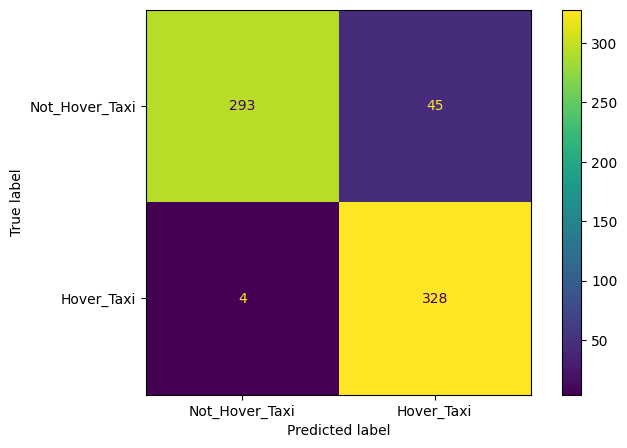

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Hover_Taxi', 'Hover_Taxi'])
cmp.plot(ax=ax)
plt.show()

In [19]:
y_test.value_counts()

0    338
1    332
Name: hover, dtype: int64

In [20]:
y.value_counts()

0    1014
1    1014
Name: hover, dtype: int64

In [40]:
import pickle

In [41]:
pickle.dump(svm, open('hover_svm.pkl', 'wb'))

In [42]:
pickle.dump(scaler, open('hover_scaler.pkl','wb'))

In [23]:
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['hover']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [24]:
#SVC
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(C=100)
#y_pred=svm.predict(X_test)

svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.96
Accuracy of SVM classifier on test set: 0.9239


In [25]:
y_pred=svm.predict(X_test)

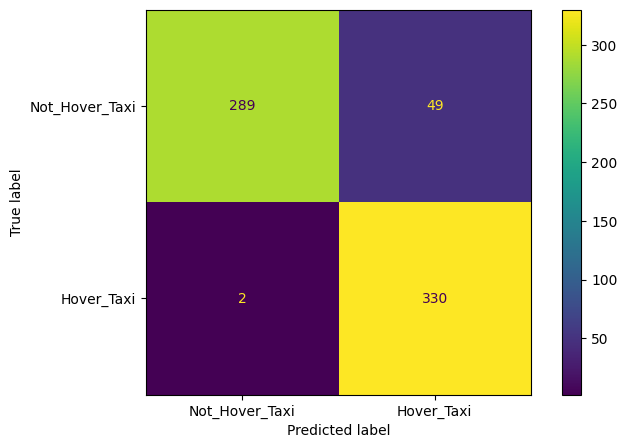

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Hover_Taxi', 'Hover_Taxi'])
cmp.plot(ax=ax)
plt.show()

In [27]:
#Tune 
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['hover']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [28]:
#SVC
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(C=100)


svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.4f}'
     .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.92
Accuracy of SVM classifier on test set: 0.9119


In [29]:
y_pred=svm.predict(X_test)

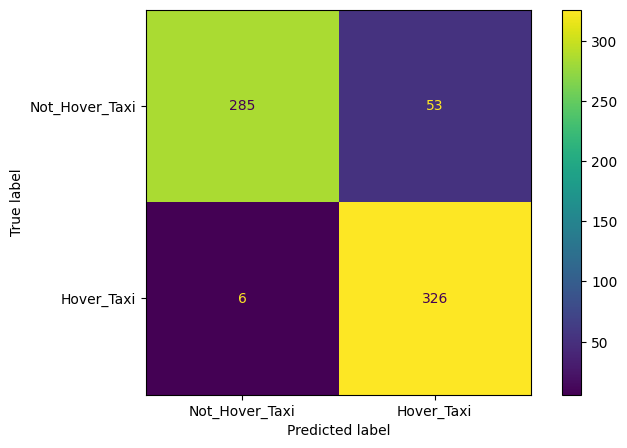

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ['Not_Hover_Taxi', 'Hover_Taxi'])
cmp.plot(ax=ax)
plt.show()

# Load New Data for validation

In [43]:
# Create a custom function for data transformation
# May as well import all of these features into the initial dataframe, you can cut it down..
# ..when you do the X,y train/test split
features = ['datetime',
          'latitude',
          'longitude',
          'absoluteAltitude', 
          'magneticHeading',
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed',
          'pitch', 
          'roll',
          'yaw',
          'angleOfAttack',
          'flightPathAngle',
          'verticalFlightPathAngle',
          'horizontalFlightPathAngle',
          'rollAcceleration',
          'pitchAcceleration',
          'yawAcceleration',
          'e1N1ng',
          'e2N1ng',
          'e1N2nf',
          'e2N2nf',
          'mainRotorRpm',
          'tailRotorRpm',
          'mainRotorTorque',
          'e1Itt',
          'e2Itt',
          'mainRotorInducedInflow',
          'flightDirectorPitch',
          'flightDirectorRoll',
          'climbOrDescentRate', 
          'hasWeightOnWheels',
          'turnRate to degPerSec',
          'cyclicPositionPitch',
          'cyclicPositionRoll',
          'collectivePosition',
          'antiTorquePedalPosition',
          'throttlePosition',
          'e1Torque',
          'e2Torque',
]


In [44]:
# reading files from 10/20 dataset
dfN = pd.read_csv('SimData_2022.10.20_17.19.15.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
dfN = df_transformation(dfN)

C:\Users\twolf\AppData\Local\Temp\ipykernel_27756\17026926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['datetime'] = df_temp.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [51]:
dfN['hover'] = 0

dfN.loc[(dfN['datetime'].between('2022-10-20 21:42:00' , '2022-10-20 21:46:30' , inclusive='both')),['hover']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:50:00' , '2022-10-20 21:52:05' , inclusive='both')),['hover']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:54:00' , '2022-10-20 21:56:45' , inclusive='both')),['hover']] = 1
dfN.loc[(dfN['datetime'].between('2022-10-20 21:58:00' , '2022-10-20 22:00:08' , inclusive='both')),['hover']] = 1

In [52]:
dfN['hover'].value_counts()

0    1771
1     692
Name: hover, dtype: int64

In [53]:
df1 = dfN[(dfN['hover'] == 0)].sample(n=692, replace=False, random_state=123458)
df2 = pd.concat([dfN[(dfN['hover'] == 1)], df1], ignore_index = True)
df2 = df2.sample(frac=1)

In [54]:
dfN['hover'].value_counts()

0    1771
1     692
Name: hover, dtype: int64

In [56]:
#Tune 
#Edit the model features to whatever you want to include in your model
model_features = [ 'hasWeightOnWheels',
            'absoluteAltitude',
                 'magneticHeading', 
                 'groundSpeed', 
                 'climbOrDescentRate',
                 'turnRate to degPerSec',
                 'cyclicPositionPitch',
                 'cyclicPositionRoll',
                 'collectivePosition',
                 'antiTorquePedalPosition',
                 'throttlePosition',
                 'e1Torque',
                 'e2Torque']

#X is predictor features, y is classifier 
X = df2[model_features]
y = df2['hover']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=516516)

In [57]:
svm_loaded = pickle.load(open('hover_svm.pkl', 'rb'))
scaler_loaded = pickle.load(open('hover_scaler.pkl','rb'))

In [58]:
#SVC

X_valid = scaler_loaded.transform(X)

In [59]:
validation_svm = svm_loaded.predict(X_valid)
print("Accuracy of Model::",accuracy_score(y,validation_svm))

Accuracy of Model:: 0.796242774566474
